# IPL Dataset- Exploratory Data Analysis


In [1]:
#Importing the necessary libraries

                          
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns

%matplotlib inline

In [2]:
#Loading the Dataset

ipl=pd.read_csv('IPL Matches 2008-2020.csv')
ipl.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [3]:
print('The shape of IPL Datset is :',ipl.shape)
print('The number of columns in the datset is:',len(ipl.columns))

The shape of IPL Datset is : (816, 17)
The number of columns in the datset is: 17


In [4]:
print('The features are:',ipl.columns)

The features are: Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')


In [5]:
## The description of dataset
ipl.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [6]:
# The datatypes of each feature
ipl.dtypes


id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

## Data Analysis

In this stage the following steps are required:

* Missing Values

  1-For continuous variable

  2-For categorical variable
  

* Replacing value for repeated team names



### Missing Values

<AxesSubplot:>

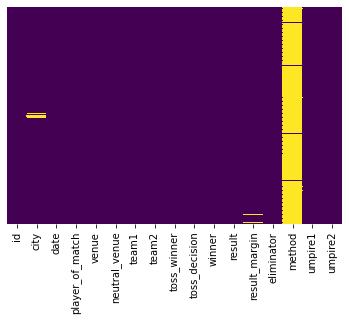

In [7]:
#Seeing the missing values
sns.heatmap(ipl.isnull(),cmap='viridis',cbar=False,yticklabels=False)

We can see the **method** field is having most of the null values , lets delete the method column.

In [8]:
ipl=ipl.drop(columns=['method'])

In [9]:
ipl.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


The missing values are: id                  0
city               13
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin      17
eliminator          4
umpire1             0
umpire2             0
dtype: int64


<AxesSubplot:>

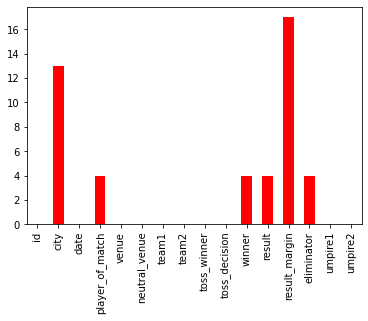

In [10]:
## To check the remaining missing value
print('The missing values are:',ipl.isnull().sum())
ipl.isna().sum().plot(kind = 'bar' ,color = 'red')

In [11]:
## Handeling continious variable i.e. result_margin by replacing nan values by the median
ipl['result_margin']=ipl['result_margin'].fillna(ipl['result_margin'].median())
ipl.isnull().sum()

id                  0
city               13
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin       0
eliminator          4
umpire1             0
umpire2             0
dtype: int64

In [12]:
## The remaining feature are all categorical feature.
## We could replace the nan values in categorical feature with new labels 

ipl['eliminator'].fillna('mode',inplace = True)
ipl['winner'].fillna('No-Result',inplace = True)
ipl['result'].fillna('No-Result',inplace = True)
ipl['player_of_match'].fillna('No-Result',inplace = True)
ipl['city'].fillna('Unknown',inplace = True)

In [13]:
## All the nan values are dealt with
ipl.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

### Replacing value for repeated team names

In [14]:
## We can see that there are repeated names of same teams
len(ipl['winner'].unique())

16

In [15]:
## Lets rename the Team names as per the standard names of their franchesis. Need to convert the below names i.e
#  Deccan Chargers = Sunrisers Hyderabad - Team Hyderabad
#  Delhi Daredevils = Delhi Capitals
#  Pune Warriors  = Rising Pune Supergiants
ipl = ipl.replace(['Deccan Chargers'] ,'Sunrisers Hyderabad')
ipl = ipl.replace(['Delhi Daredevils'] ,'Delhi Capitals')
ipl = ipl.replace(['Pune Warriors'] ,'Rising Pune Supergiants')
ipl = ipl.replace(['Rising Pune Supergiant'] ,'Rising Pune Supergiants')
ipl = ipl.replace(['Rising Pune Supergiants'] ,'Pune')


In [16]:
len(ipl['winner'].unique())

12

### Finding season from Date

In [17]:
ipl['date'] = pd.to_datetime(ipl['date'])
ipl['season'] = ipl['date'].dt.year

ipl.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008


### Visualization

Text(0.5, 0, 'Teams')

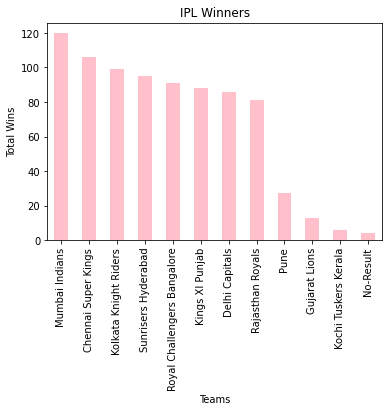

In [18]:
## Finding out victory for each team

ipl['winner'].value_counts().plot(kind = 'bar' ,color = 'pink')

plt.title('IPL Winners') 
plt.ylabel('Total Wins') 
plt.xlabel('Teams')  


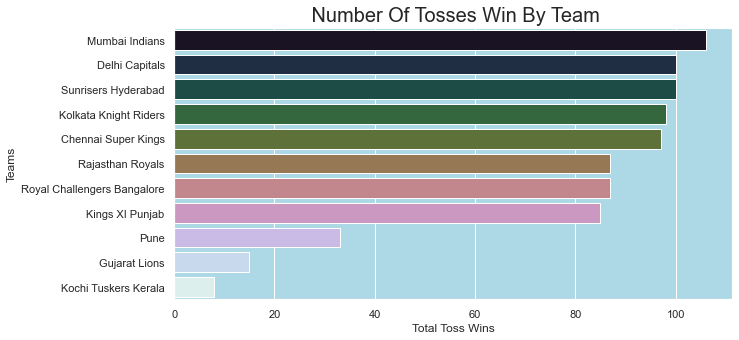

In [19]:
## Winner of Toss
toss_winner = ipl['toss_winner'].value_counts().reset_index()
toss_winner
sns.set(rc={'figure.figsize':(10,5)})


ax = plt.axes()
ax.set(facecolor = 'lightblue')
plt.title(' Number Of Tosses Win By Team',fontsize = 20)
sns.barplot(y = toss_winner['index'] ,x = toss_winner['toss_winner'],orient = 'h',palette = 'cubehelix')
plt.xlabel('Total Toss Wins')
plt.ylabel('Teams')
plt.show()

In [20]:
## Man of the match
man_of_match=ipl['player_of_match'].value_counts().reset_index()[0:10]
man_of_match

,index,player_of_match
0,AB de Villiers,23
1,CH Gayle,22
2,RG Sharma,18
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,16
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,13


Text(0, 0.5, 'Number of Matches')

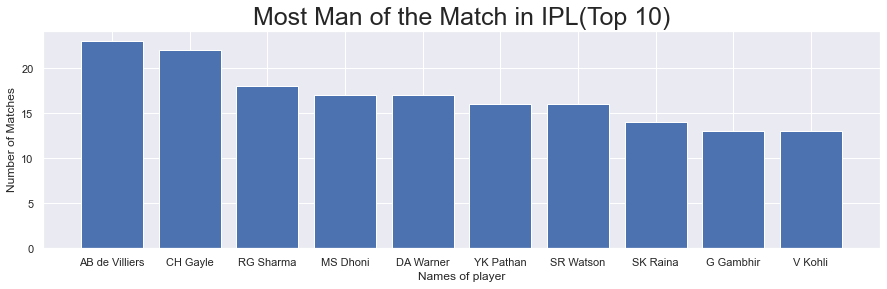

In [21]:
## Player of the match
plt.figure(figsize=(15,4))
plt.bar(man_of_match['index'],man_of_match['player_of_match'])
plt.title('Most Man of the Match in IPL(Top 10)',fontsize=25)
plt.xlabel('Names of player',)
plt.ylabel('Number of Matches')



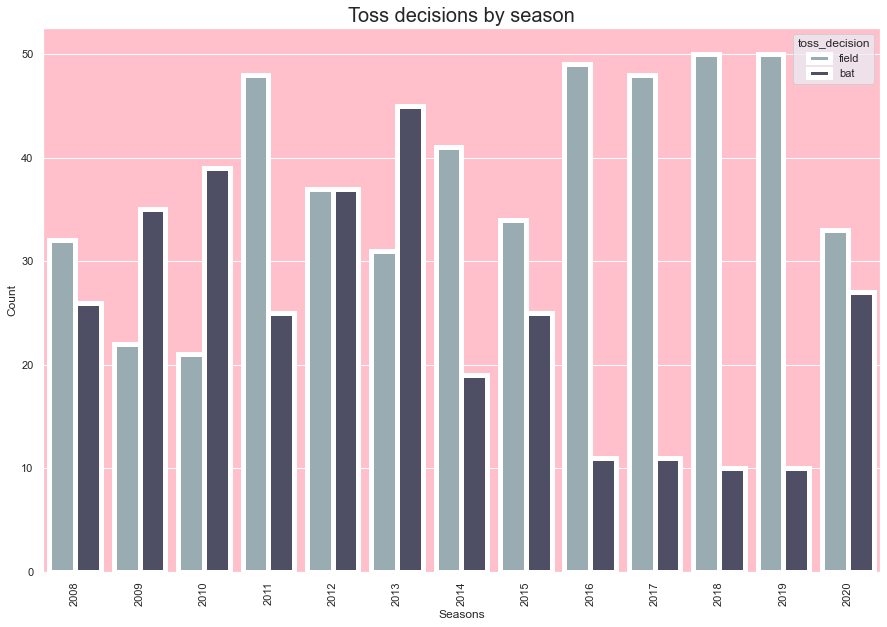

In [23]:
## Finding the toss decision per season
plt.figure(figsize = (15,10))
ax = plt.axes()
ax.set(facecolor = 'pink')
#ax.grid(False)
sns.countplot(data = ipl,x = 'season',hue = 'toss_decision',palette = 'bone_r',linewidth=5)
plt.xticks(rotation  = 90)
plt.title('Toss decisions by season',fontsize = 20)
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Trophies Won')

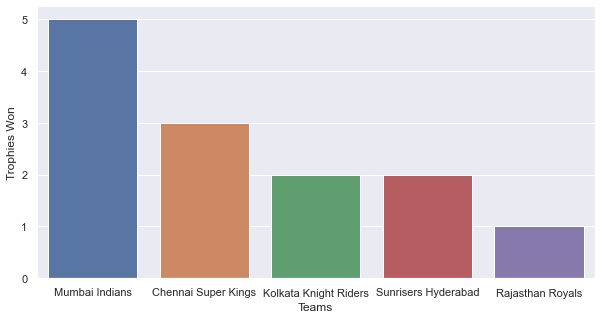

In [24]:
#finding the final match of season in order to decide the winner

final = ipl.groupby('season').tail(1)
final['winner'].value_counts()

sns.countplot(x=final['winner'],order=final['winner'].value_counts().index)
plt.xlabel('Teams')
plt.ylabel('Trophies Won')

In [25]:
ipl.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008


In [54]:
## The information on teams performance
teams=pd.concat([ipl['team1'],ipl['team2']])
teams=teams.value_counts().reset_index()
teams.columns=['Team','Total Matches']
teams['Wins']=ipl['winner'].value_counts().reset_index()['winner']
teams['Win percentage']=((teams['Wins']/teams['Total Matches'])*100).round()
teams.head(11)

,Team,Total Matches,Wins,Win percentage
0,Mumbai Indians,203,120,59.0
1,Sunrisers Hyderabad,199,106,53.0
2,Royal Challengers Bangalore,195,99,51.0
3,Delhi Capitals,194,95,49.0
4,Kolkata Knight Riders,192,91,47.0
5,Kings XI Punjab,190,88,46.0
6,Chennai Super Kings,178,86,48.0
7,Rajasthan Royals,161,81,50.0
8,Pune,76,27,36.0
9,Gujarat Lions,30,13,43.0


([<matplotlib.patches.Wedge at 0x2203fe9e070>,
 [Text(-0.13489133403675924, 1.2929827253299961, 'wickets'),
  Text(0.050037242892917715, -1.2990366716623805, 'runs'),
  Text(1.2957534382819842, -0.10499060520073417, 'tie'),
  Text(1.2998458448950094, -0.020019478244422385, 'No-Result')],
 [Text(-0.08301005171492874, 0.7956816771261512, '53.3%'),
  Text(0.030792149472564742, -0.7994071825614649, '44.6%'),
  Text(0.7973867312504517, -0.0646096032004518, '1.6%'),
  Text(0.7999051353200057, -0.012319678919644545, '0.5%')])

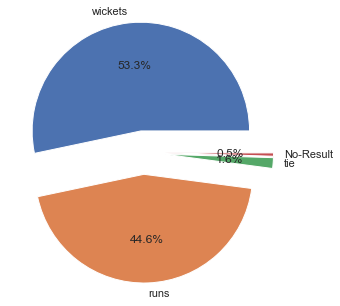

In [73]:
## The winning of team
result=ipl['result'].value_counts().reset_index()
explode=[0.2,0.2,0.2,0.2]
plt.pie(result['result'],labels=result['index'],autopct='%1.1f%%', shadow=False,explode=explode)
